In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
import json
import numpy as np

# Set the working directory to the src folder
os.chdir('/mnt/c/Dokumenter/Dokumenter/UNI/Master/Thesis/GitHub_Repo/Master_Thesis/data')


# Functions

In [193]:
def plot_age_group_distribution(df, title, figsize=(10, 6)):
    """
    Plots the distribution of age groups within the provided DataFrame.

    Parameters:
    - df: Pandas DataFrame containing an 'Age' column.
    - figsize: tuple, optional, default (10, 6)
        The dimensions for the figure size.
    """
    # Ensure 'Age' is of type integer
    df['Age'] = df['Age'].astype(int)

    # Define the age groups and corresponding labels
    age_bins = [0, 4, 7, 10, 13, 16, 19]  # adding one more bin for 16-18
    age_labels = ['0-3', '4-6', '7-9', '10-12', '13-15', '16-18']

    # Update the DataFrame with age groupings
    df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

    # Create the bar plot for the age groups
    plt.figure(figsize=figsize)
    ax = sns.countplot(data=df, x='Age Group', palette='coolwarm')
    plt.title(f"Age Group Distribution - {title}")
    plt.xlabel("Age Group")
    plt.ylabel("# images")
    plt.xticks(rotation=45)
    plt.grid(axis='y')

    # Add value counts to the top of each bar
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 5), textcoords='offset points')

    # Show the plot
    plt.tight_layout()
    plt.show()

    return df

# number of images in each age group colored by mated

def plot_age_group_distribution_mated(df, title, figsize=(11, 7)):
    """
    Plots the distribution of age groups within the provided DataFrame.

    Parameters:
    - df: Pandas DataFrame containing an 'Age' column.
    - figsize: tuple, optional, default (10, 6)
        The dimensions for the figure size.
    """
    # Ensure 'Age' is of type integer
    df['Age'] = df['Age'].astype(int)

    # Define the age groups and corresponding labels
    age_bins = [1, 4, 7, 10, 13, 16, 19]  # adding one more bin for 16-18
    age_labels = ['1-3', '4-6', '7-9', '10-12', '13-15', '16-18']

    enrolled_palette = {'Enrolled': '#1f77b4', 'Non-enrolled': '#ff7f0e'}


    # Update the DataFrame with age groupings
    df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

    # Create the bar plot for the age groups
    plt.figure(figsize=figsize)
    # ax = sns.countplot(data=df, x='Age Group', hue='Mated', palette='coolwarm')
    ax = sns.countplot(data=df, x='Age Group', hue='Enrolled', palette=enrolled_palette, alpha = 0.6)

    plt.title(f"Age Group Distribution - {title}")
    plt.xlabel("Age Group")
    plt.ylabel("# images")
    plt.xticks(rotation=45)
    plt.grid(axis='y')

    # Add value counts to the top of each bar
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 5), textcoords='offset points')

    # Show the plot
    plt.tight_layout()
    plt.show()

    return df


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def number_of_enrolled_ids_agebin(df, title, figsize=(11, 7)):
    """
    Plots the distribution of unique image IDs within the provided DataFrame,
    grouped by age bins and enrollment status, with specific colors for enrolled and non-enrolled.

    Parameters:
    - df: Pandas DataFrame containing 'Age' and 'im_id' columns.
    - title: str
        The title for the plot.
    - figsize: tuple, optional, default (10, 6)
        The dimensions for the figure size.
    """
    # Ensure 'Age' is of type integer
    df['Age'] = df['Age'].astype(int)

    # Define the age groups and corresponding labels
    age_bins = [1, 4, 7, 10, 13, 16, 20]  # Adjusted to include 19
    age_labels = ['1-3', '4-6', '7-9', '10-12', '13-15', '16-19']

    # Update the DataFrame with age groupings
    df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

    # Group by 'Age Group' and 'Enrolled', then count unique 'im_id'
    age_enrolled_counts = df.groupby(['Age Group', 'Enrolled'])['identity_name'].nunique().reset_index(name='Count')

    # Define the colors for the plot
    # enrolled_palette = {'Enrolled': 'cornflowerblue', 'Non-enrolled': 'orange'}
    # Define the colors for the plot
    enrolled_palette = {'Enrolled': '#1f77b4', 'Non-enrolled': '#ff7f0e'}




    # Create the bar plot for the age groups with count of unique image IDs
    plt.figure(figsize=figsize)
    ax = sns.barplot(data=age_enrolled_counts, x='Age Group', y='Count', hue='Enrolled', palette=enrolled_palette, alpha = 0.6)

    plt.title(f"Age Group Distribution of Enrollled IDs - {title}")
    plt.xlabel("Age Group")
    plt.ylabel("# Enrolled image IDs")
    plt.xticks(rotation=45)
    plt.grid(axis='y')

    # Customize the legend
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, ["Enrolled", "Non-Enrolled"], title='Enrolled Status')

    # Add value counts to the top of each bar
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 5), textcoords='offset points')

    # Show the plot
    plt.tight_layout()
    plt.show()

    return df


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_ethnicity_distribution(df, title):
    # Load data
    df = df
    sns.set_style("whitegrid")
    # Plotting the distribution of ethnicity
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(data=df, x='ethnicity', order=df['ethnicity'].value_counts().index,alpha=0.6)
    plt.title(f'Ethnicity Distribution - {title}')
    plt.xlabel('Ethnicity')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 5), textcoords='offset points')
    plt.show()



import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_combined_ethnicity_distribution(df1, df2, title1, title2):
    # Setting the style
    sns.set_style("whitegrid")

    # Create a list of all unique ethnicities from both dataframes
    all_ethnicities = pd.concat([df1['ethnicity'], df2['ethnicity']]).unique()
    all_ethnicities.sort()

    # Preparing the figure
    plt.figure(figsize=(12, 8))

    # Calculate the width of the bars
    total_width = 0.8
    width = total_width / 2
    x = np.arange(len(all_ethnicities))

    # Plotting the first dataframe
    ax1 = sns.barplot(data=df1, x='ethnicity', y=df1.groupby('ethnicity').size(),
                      order=all_ethnicities, color='lightgreen', label=title1, alpha=0.6,
                      estimator=len, errorbar=None, zorder=2, width=width)
    ax1.set_xticks(x - width/2)

    # Plotting the second dataframe
    ax2 = sns.barplot(data=df2, x='ethnicity', y=df2.groupby('ethnicity').size(),
                      order=all_ethnicities, color='skyblue', label=title2, alpha=0.6,
                      estimator=len, errorbar=None, zorder=3, width=width)
    ax2.set_xticks(x + width/2)

    # Adding title and labels
    plt.title('Combined Ethnicity Distribution')
    plt.xlabel('Ethnicity')
    plt.ylabel('Image count')
    plt.xticks(x, all_ethnicities, rotation=45)

    # Adding annotations for count on each bar
    for p in ax1.patches + ax2.patches:
        ax1.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 5), textcoords='offset points')

    # Adding a legend to distinguish between the two dataframes
    plt.legend(title="Dataset")

    plt.show()

# Children balanced

In [194]:
# # Mated and non-mated ids ###OBS
# c_df = pd.read_csv('../data/child_balanced.csv')
# c_mates = c_df.groupby("im_id").agg({'im_id': ['count']})
# c_mated_ids = c_mates[c_mates[('im_id', 'count')] > 1].index


# c_df['Enrolled'] = np.where(c_df['im_id'].isin(c_mated_ids), 'Enrolled', 'Non-enrolled')

In [195]:
# c_mates = c_df.groupby("im_id").agg({'im_id': ['count']})
# c_mated_ids = c_mates[c_mates[('im_id', 'count')] > 1].index

In [196]:
# plot_age_group_distribution(c_df, 'Children balanced')

In [4]:
import os
os.getcwd()

'/mnt/c/Dokumenter/Dokumenter/UNI/Master/Thesis/GitHub_Repo/Master_Thesis/notebooks/data_vis'

In [6]:
import sys
sys.path.insert(0, '../../utils')

In [8]:

from Data_proc_utils.Data_proc_funcs import *

random_states = [48585]
# children_all = pd.read_csv('../data/image_info_csvs/YLFW_full_info_including_adults.csv')
children_all = pd.read_csv('../../data/image_info_csvs/final_filtered_children_df_BIBEL.csv')
children_balanced_df_1 = balance_child_data(children_all, print_stats=True, random_state=random_states[0])


minority age group from childrens data:  16-18 
number of images:  382 

racial distribution: ethnicity
African      148
Indian       134
Asian         65
Caucasian     35
Name: image_name, dtype: int64 

All new groups should have same distribution

Other age group stats: 
0-3
 ethnicity
African      148
Indian       134
Asian         65
Caucasian     35
Name: image_name, dtype: int64

16-18 ethnicity
African      148
Indian       134
Asian         65
Caucasian     35
Name: image_name, dtype: int64
Balanced data?: 16-18    382
0-3      382
4-6      382
7-9      382
10-12    382
13-15    382
Name: children_agegroup, dtype: int64


In [198]:
########### Adults

children_all = pd.read_csv('../data/image_info_csvs/final_filtered_children_df_BIBEL.csv')


In [9]:

children_balanced_df_1 = balance_child_data(children_all, print_stats=True, random_state=random_states[0])


minority age group from childrens data:  16-18 
number of images:  382 

racial distribution: ethnicity
African      148
Indian       134
Asian         65
Caucasian     35
Name: image_name, dtype: int64 

All new groups should have same distribution

Other age group stats: 
0-3
 ethnicity
African      148
Indian       134
Asian         65
Caucasian     35
Name: image_name, dtype: int64

16-18 ethnicity
African      148
Indian       134
Asian         65
Caucasian     35
Name: image_name, dtype: int64
Balanced data?: 16-18    382
0-3      382
4-6      382
7-9      382
10-12    382
13-15    382
Name: children_agegroup, dtype: int64


In [10]:
# count

9145

NameError: name 'adults_balanced_df_1' is not defined

In [11]:
9145/2

4572.5

In [200]:
print(len(adults_balanced_df_1), len(children_balanced_df_1))

2581 2292


In [18]:

adults_all = pd.read_csv('../../data/image_info_csvs/RFW_full_info_excluding_children.csv')
adults_balanced_df_1 = balance_adults_data_enrolled(children_balanced_df_1, adults_all, print_stats=True, random_state=random_states[0])


Balanced data between adults and children?: 

adults:  ethnicity
African      507
Indian       429
Asian        257
Caucasian    181
Name: identity_name, dtype: int64 
number of enrolled, and non-enrolled ids (a):  548 826 

children:  ethnicity
African      507
Indian       429
Asian        257
Caucasian    181
Name: identity_name, dtype: int64 
number of enrolled, and non-enrolled ids (c):  548 826
Duplicates? 0
is child ids same as adults ids number non-enrolled? 157 157


In [202]:
print(len(adults_balanced_df_1))
print(len(children_balanced_df_1))

2581
2292


In [203]:
507+429+257+181

1374

In [204]:
548 +826

1374

In [205]:
adults_balanced_df_1
# children_balanced_df_1

,image_name,identity_name,ethnicity,Age,children_agegroup
0,m.017hjz_0001,m.017hjz,Asian,42,NaN
1,m.017hjz_0002,m.017hjz,Asian,59,NaN
2,m.017hjz_0003,m.017hjz,Asian,48,NaN
3,m.01nmfd_0001,m.01nmfd,Asian,47,NaN
4,m.01nmfd_0002,m.01nmfd,Asian,40,NaN
...,...,...,...,...,...
2576,m.01p76zn_0001,m.01p76zn,Caucasian,32,NaN
2577,m.01p7yb_0002,m.01p7yb,Caucasian,44,NaN
2578,m.01p8r8_0002,m.01p8r8,Caucasian,44,NaN
2579,m.01p9wc__0001,m.01p9wc_,Caucasian,33,NaN


In [34]:
# Count how many times each identity_name occurs
counts = children_all['identity_name'].value_counts()

# Filter to get the identity names that occur exactly once
single_occurrence = counts[counts > 1].index
len(single_occurrence)
# Filter the original DataFrame to include only rows with these identity names
# result_df = adults_balanced_df_1[adults_balanced_df_1['identity_name'].isin(single_occurrence)]


2451

In [29]:
2451/2

1225.5

In [30]:
1505-1225

280

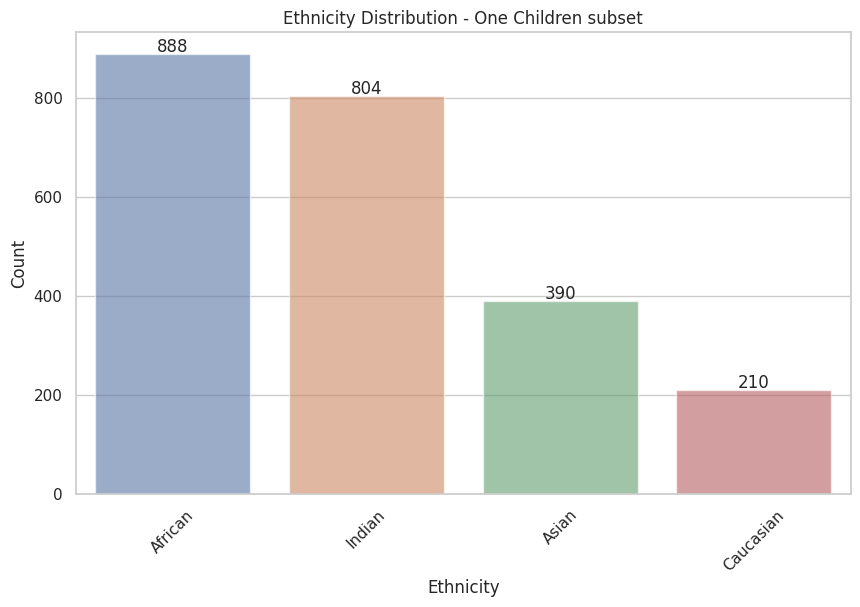

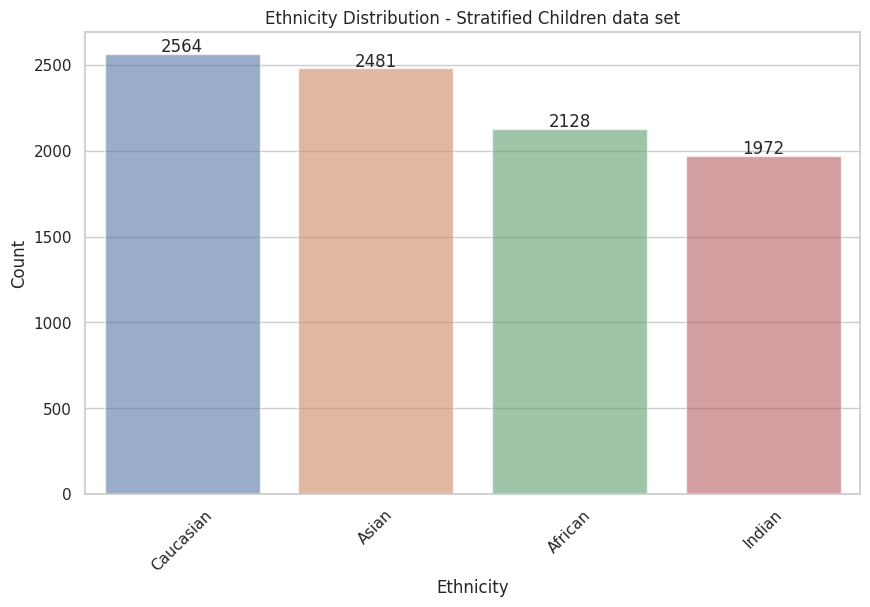

In [207]:
# Example usage
plot_ethnicity_distribution(children_balanced_df_1, 'One Children subset')
plot_ethnicity_distribution(children_all, 'Stratified Children data set')


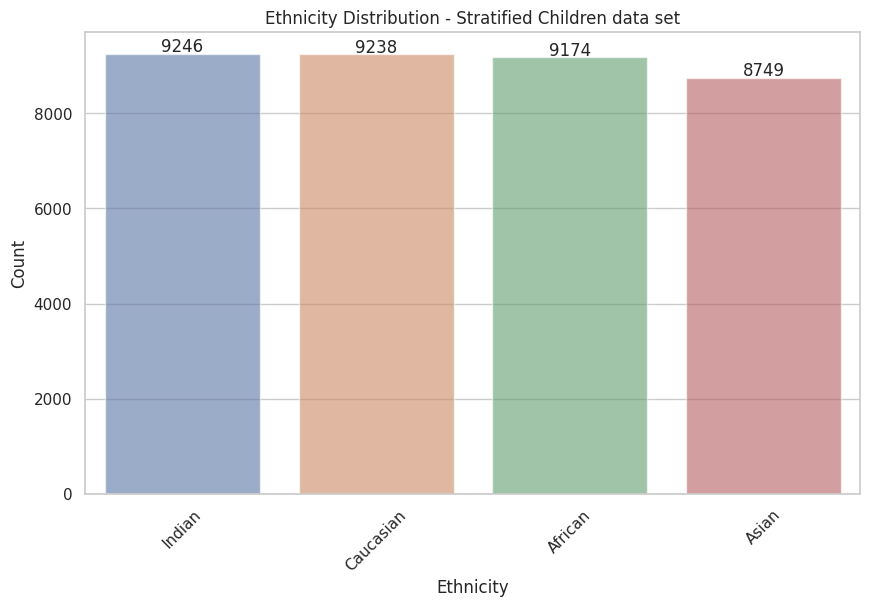

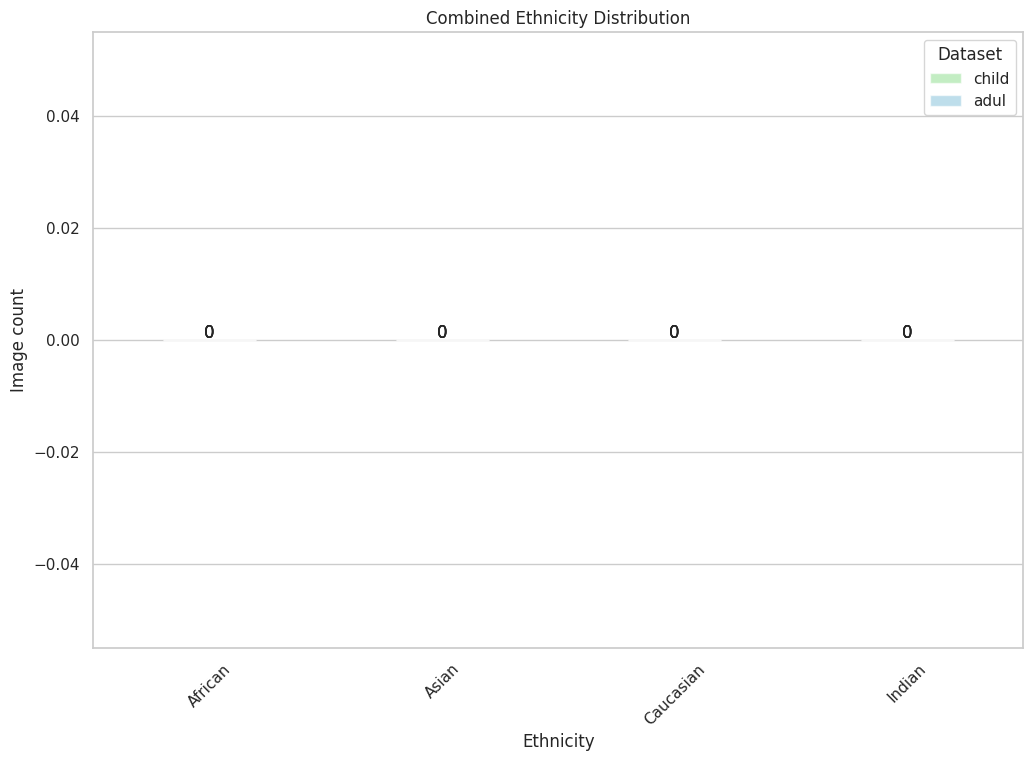

In [208]:
plot_ethnicity_distribution(adults_all, 'Stratified Children data set')
plot_combined_ethnicity_distribution(children_balanced_df_1, adults_balanced_df_1, 'child', 'adul')

In [209]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_combined_ethnicity_distribution(df1, df2, title1, title2, title_all):
    sns.set_style("whitegrid")

    # Combining and sorting ethnicities
    all_ethnicities = pd.concat([df1['ethnicity'], df2['ethnicity']]).unique()
    all_ethnicities.sort()

    # Prepare data
    df1_counts = df1['ethnicity'].value_counts().reindex(all_ethnicities, fill_value=0).reset_index()
    df1_counts.columns = ['ethnicity', 'count']
    df2_counts = df2['ethnicity'].value_counts().reindex(all_ethnicities, fill_value=0).reset_index()
    df2_counts.columns = ['ethnicity', 'count']

    # Plot setup
    plt.figure(figsize=(10, 6))
    width = 0.35  # Width of the bars

    # Plotting
    x = np.arange(len(all_ethnicities))  # the label locations
    plt.bar(x - width/2, df1_counts['count'], width, label=title1, color='lightgreen', alpha=0.6)
    plt.bar(x + width/2, df2_counts['count'], width, label=title2, color='skyblue', alpha=0.6)

    # Labels, title and custom x-axis tick labels
    plt.ylabel('Image count')
    plt.title(f'Combined Ethnicity Distribution - {title_all}')
    plt.xticks(x, all_ethnicities, rotation=45)
    plt.xlabel('Ethnicity')

    # Adding a legend
    plt.legend(title="Dataset")

    plt.show()

# Example usage:
# plot_combined_ethnicity_distribution(df1, df2, 'Dataset 1', 'Dataset 2')


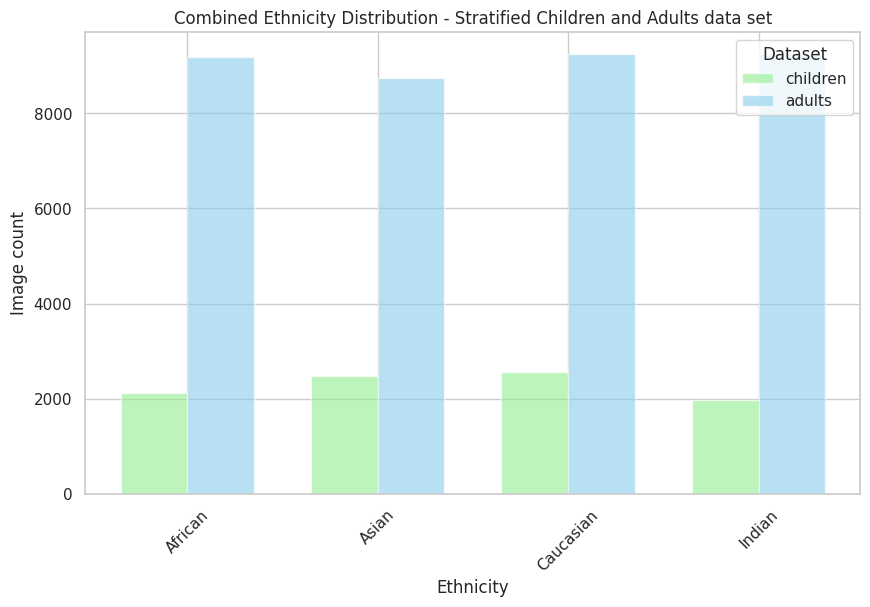

In [210]:
plot_combined_ethnicity_distribution(children_all, adults_all, 'children', 'adults', 'Stratified Children and Adults data set')

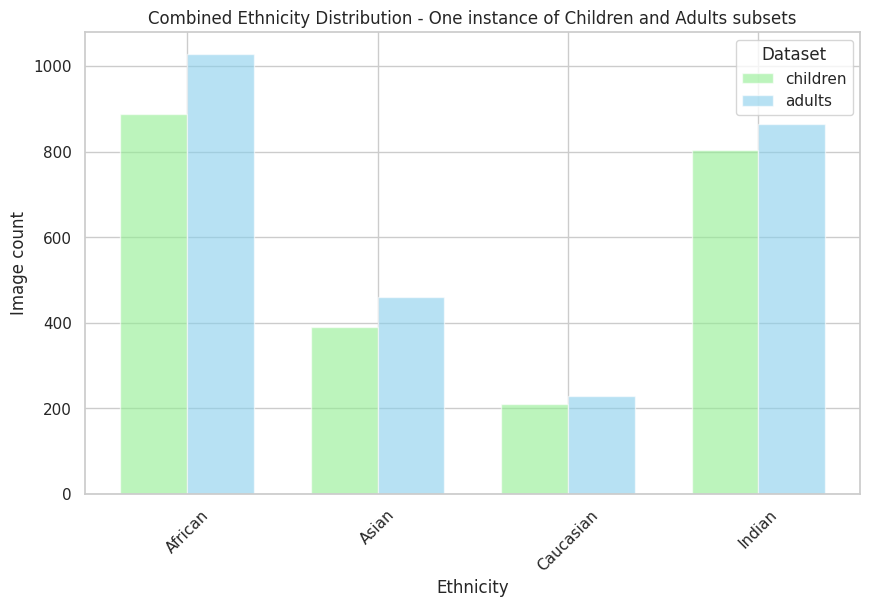

In [211]:
plot_combined_ethnicity_distribution(children_balanced_df_1, adults_balanced_df_1, 'children', 'adults', 'One instance of Children and Adults subsets')

In [217]:
# Mated and non-mated ids ###OBS
c_df = children_balanced_df_1
c_mates = c_df.groupby("identity_name").agg({'identity_name': ['count']})
c_mated_ids = c_mates[c_mates[('identity_name', 'count')] > 1].index


children_balanced_df_1['Enrolled'] = np.where(children_balanced_df_1['identity_name'].isin(c_mated_ids), 'Enrolled', 'Non-enrolled')


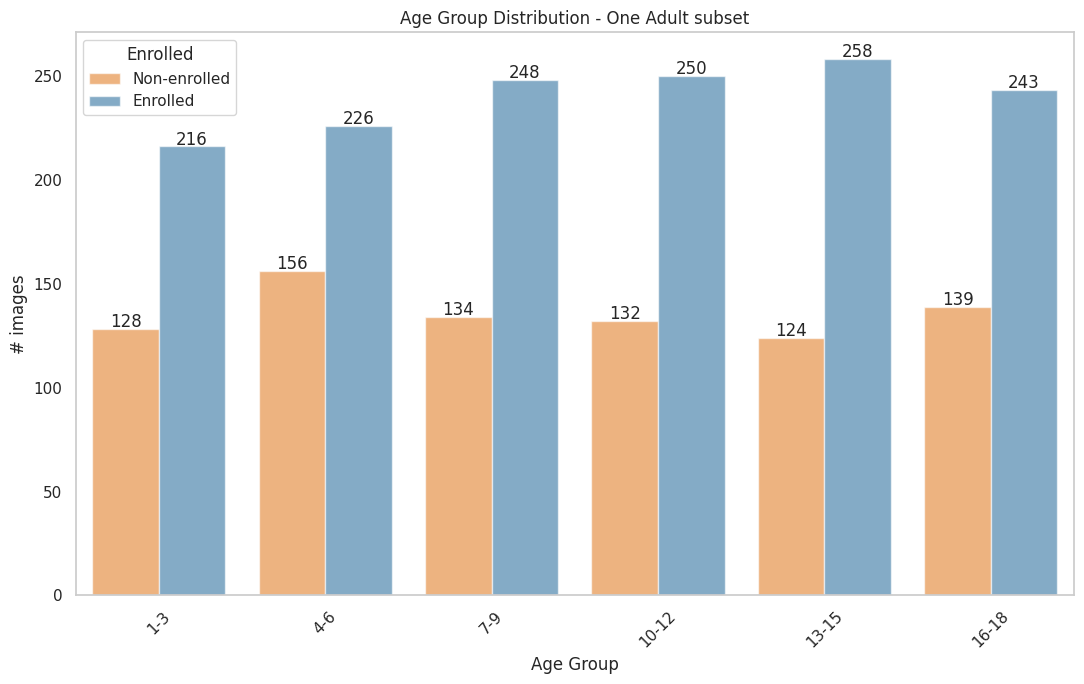

,Unnamed: 0,image_name,Age,ethnicity,children_agegroup,identity_name,Enrolled,Age Group
0,8,Asian_446_33,18,Asian,16-18,Asian_446,Non-enrolled,16-18
1,23,Indian_385_56,17,Indian,16-18,Indian_385,Enrolled,16-18
2,33,African_560_0,18,African,16-18,African_560,Non-enrolled,16-18
3,59,Caucasian_530_40,17,Caucasian,16-18,Caucasian_530,Enrolled,16-18
4,61,African_21_0,18,African,16-18,African_21,Enrolled,16-18
...,...,...,...,...,...,...,...,...
2287,6270,Indian_64_0,14,Indian,13-15,Indian_64,Non-enrolled,13-15
2288,5124,Indian_50_0,15,Indian,13-15,Indian_50,Non-enrolled,13-15
2289,4827,Indian_717_1,13,Indian,13-15,Indian_717,Enrolled,13-15
2290,2763,Indian_142_1,14,Indian,13-15,Indian_142,Enrolled,13-15


In [218]:
plot_age_group_distribution_mated(children_balanced_df_1, 'One Adult subset')


In [221]:
number_of_enrolled_ids_agebin(children_balanced_df_1, 'One Children subset')

ValueError: Could not interpret input 'Count'

<Figure size 1100x700 with 0 Axes>

In [222]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def number_of_enrolled_ids(df, title, figsize=(11, 7)):
    """
    Plots the distribution of unique image IDs within the provided DataFrame,
    grouped by age and enrollment status, with specific colors for enrolled and non-enrolled.

    Parameters:
    - df: Pandas DataFrame containing 'Age' and 'im_id' columns.
    - title: str
        The title for the plot.
    - figsize: tuple, optional, default (11, 7)
        The dimensions for the figure size.
    """
    # Ensure 'Age' is of type integer
    df['Age'] = df['Age'].astype(int)

    # Group by 'Age' and 'Enrolled', then count unique 'im_id'
    age_enrolled_counts = df.groupby(['Age', 'Enrolled'])['identity_name'].nunique().reset_index(name='Count')

    # Define the colors for the plot
    enrolled_palette = {'Enrolled': '#1f77b4', 'Non-enrolled': '#ff7f0e'}

    # Create the bar plot for the age groups with count of unique image IDs
    plt.figure(figsize=figsize)
    ax = sns.barplot(data=age_enrolled_counts, x='Age', y='Count', hue='Enrolled', palette=enrolled_palette, alpha=0.6)

    plt.title(f"Age Distribution of Enrolled IDs - {title}")
    plt.xlabel("Age")
    plt.ylabel("# Enrolled Image IDs")
    plt.xticks(rotation=45)
    plt.grid(axis='y')

    # Customize the legend
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, ["Enrolled", "Non-Enrolled"], title='Enrollment Status')

    # Add value counts to the top of each bar
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 5), textcoords='offset points')

    # Show the plot
    plt.tight_layout()
    plt.show()

    return df

# Example usage:
# df = load_your_dataframe_here()


In [223]:
number_of_enrolled_ids(adults_balanced_df_1, "Your Plot Title Here")


KeyError: 'Enrolled'

# Canonical children data

In [62]:
canonical_df = pd.read_csv('../data/OFIQ_results/canonical_children.csv', sep=';')

In [69]:
canonical_df.head()

,Filename,UnifiedQualityScore,BackgroundUniformity,IlluminationUniformity,LuminanceMean,LuminanceVariance,UnderExposurePrevention,OverExposurePrevention,DynamicRange,Sharpness,...,DownwardCropOfTheFaceImage.scalar,UpwardCropOfTheFaceImage.scalar,HeadPoseYaw.scalar,HeadPosePitch.scalar,HeadPoseRoll.scalar,ExpressionNeutrality.scalar,NoHeadCoverings.scalar,Unnamed: 57,im_id,image_names
0,African_0_1.png,21.258804,90.363855,0.609568,0.108497,0.010054,0.592055,0.0,6.148537,47,...,3,0,93,100,100,9,100,NaN,African_0,African_0_1
1,African_113_23.png,21.250883,100.621804,0.152006,0.208841,0.006678,0.109010,0.0,6.361239,-27,...,3,0,94,93,100,18,100,NaN,African_113,African_113_23
2,African_113_46.png,21.746929,60.420552,0.662809,0.318986,0.024407,0.113743,0.0,7.123347,-15,...,1,0,97,87,100,50,100,NaN,African_113,African_113_46
3,African_114_5.png,20.960348,77.353601,0.756084,0.127336,0.006598,0.408700,0.0,6.254216,45,...,1,0,97,100,100,71,0,NaN,African_114,African_114_5
4,African_119_4.png,24.878502,40.835322,0.278367,0.279319,0.013308,0.050315,0.0,6.850902,33,...,2,0,93,94,100,13,0,NaN,African_119,African_119_4


In [76]:
canonical_df['img_name'] = canonical_df['Filename'].str.rsplit('.', 1).str[0]
canonical_df['im_id'] = canonical_df['Filename'].str.rsplit('_', 1).str[0]


(array([   0,    2,    3, ..., 3302, 3304, 3305]),)

In [77]:
canonical_add_df = c_df[c_df['img_name'].isin(canonical_df['img_name'])]

/tmp/ipykernel_35426/482875231.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = df['Age'].astype(int)
/tmp/ipykernel_35426/482875231.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)


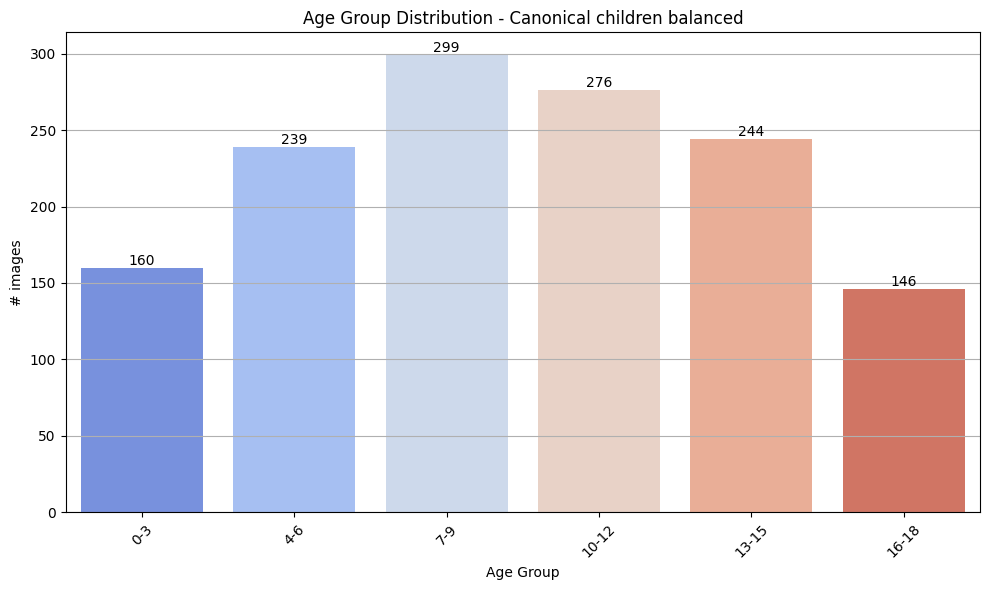

/tmp/ipykernel_35426/482875231.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = df['Age'].astype(int)
/tmp/ipykernel_35426/482875231.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)


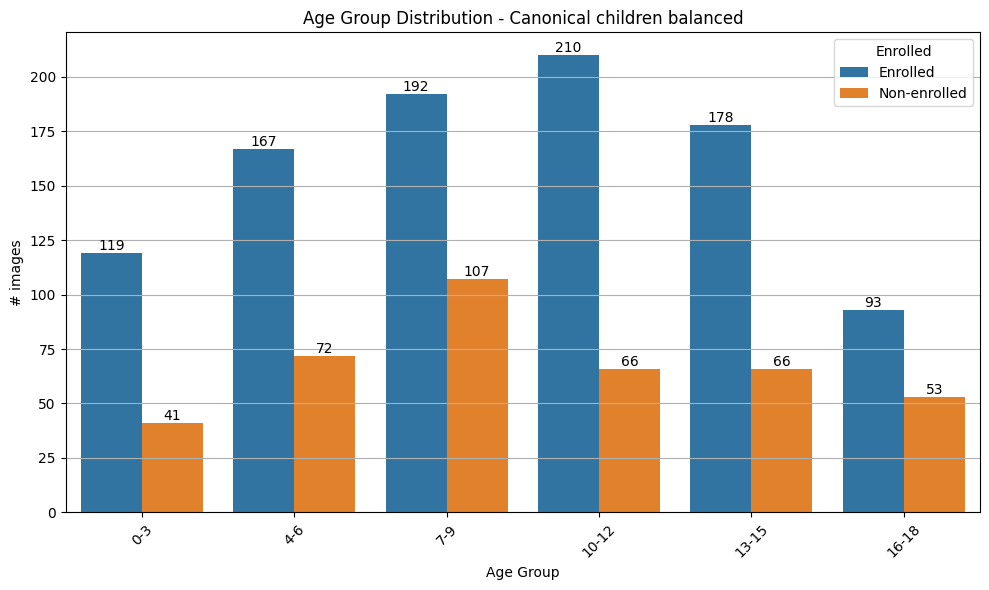

/tmp/ipykernel_35426/482875231.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = df['Age'].astype(int)
/tmp/ipykernel_35426/482875231.py:115: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)


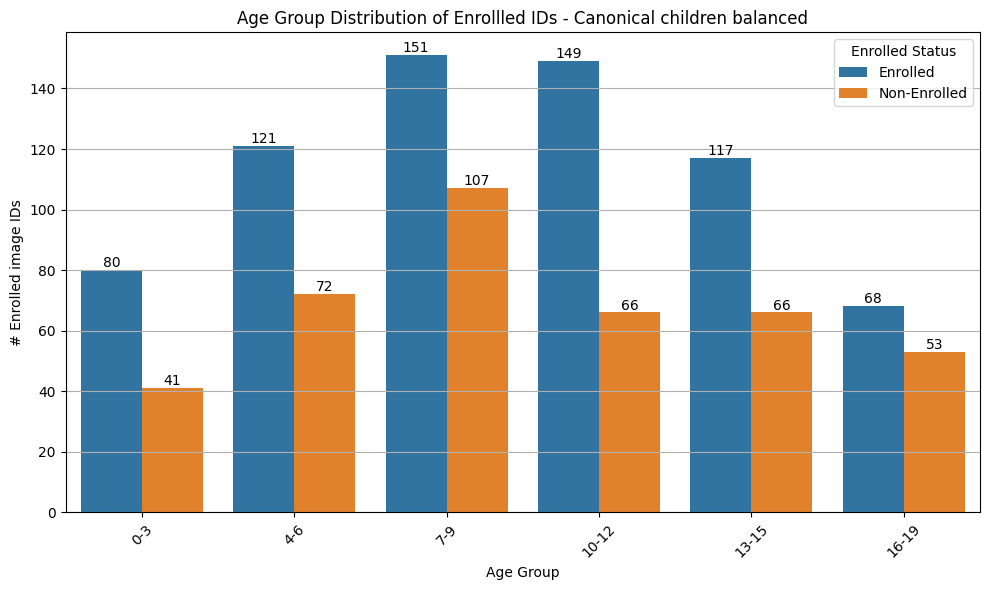

,img_name,Age,ethnicity,id_class,children_agegroup,im_id,img_org_name,face_id,Enrolled,Age Group
0,African_634_22,15,African,634,13-15,African_634,NaN,NaN,Enrolled,13-15
2,African_699_1,13,African,699,13-15,African_699,NaN,NaN,Enrolled,13-15
6,Indian_415_0,15,Indian,415,13-15,Indian_415,NaN,NaN,Enrolled,13-15
8,Caucasian_390_29,15,Caucasian,390,13-15,Caucasian_390,NaN,NaN,Enrolled,13-15
14,Indian_59_2,15,Indian,59,13-15,Indian_59,NaN,NaN,Enrolled,13-15
...,...,...,...,...,...,...,...,...,...,...
3296,Indian_459_5,18,Indian,459,16-18,Indian_459,NaN,NaN,Non-enrolled,16-19
3298,Indian_125_1,17,Indian,125,16-18,Indian_125,NaN,NaN,Enrolled,16-19
3302,Indian_515_3,18,Indian,515,16-18,Indian_515,NaN,NaN,Non-enrolled,16-19
3304,Indian_415_1,18,Indian,415,16-18,Indian_415,NaN,NaN,Enrolled,16-19


In [79]:
plot_age_group_distribution(canonical_add_df, 'Canonical children balanced')
plot_age_group_distribution_mated(canonical_add_df, 'Canonical children balanced')
number_of_enrolled_ids_agebin(canonical_add_df,'Canonical children balanced')